In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

df = pd.read_csv('Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#replace blanks with 0 as tenure is 0 and total charges are recorded

In [6]:
df["TotalCharges"]= df["TotalCharges"].replace(" ","0")
df["TotalCharges"]= df["TotalCharges"].astype("float")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df ["customerID"].duplicated().sum()

0

In [11]:
def conv(value):
    if value ==1:
        return "yes"
    else:
        return "no"
        df['SeniorCitizen']= df ["SeniorCitizen"].apply(conv)

      

#converted 0 and 1 values of senior citizen to yes/no to make it easier to understand

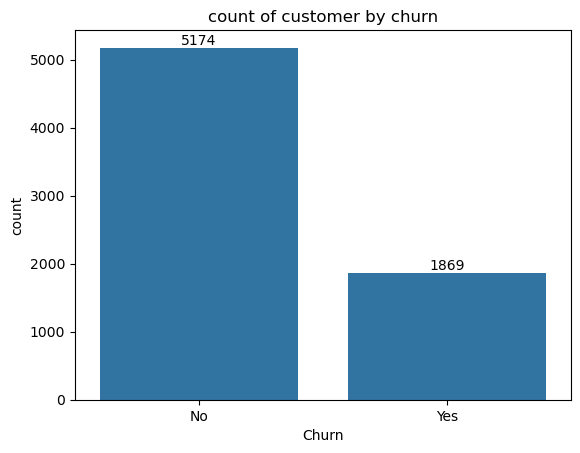

In [17]:
ax= sns.countplot(x= 'Churn', data= df)

ax.bar_label(ax.containers[0])
plt.title("count of customer by churn")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

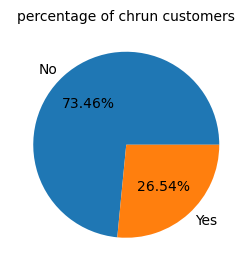

In [23]:
plt.figure(figsize= (3,4))
gb= df.groupby("Churn").agg ({'Churn':'count'})
plt.pie(gb['Churn'], labels = gb.index, autopct= "%1.2f%%")
plt.title("percentage of chrun customers", fontsize= 10)
plt.show

#from the given pie chart we can conclude that 26.54% of customers have churned out.

<function matplotlib.pyplot.show(close=None, block=None)>

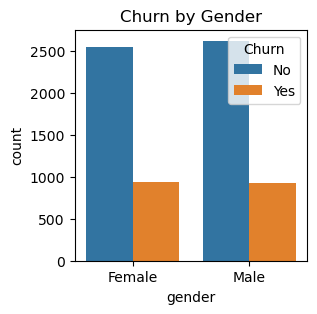

In [3]:
plt.figure(figsize = (3,3))
sns.countplot(x= "gender", data= df, hue = "Churn")
plt.title("Churn by Gender")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

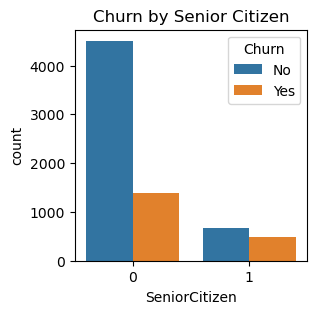

In [7]:
plt.figure(figsize = (3,3))
sns.countplot(x= "SeniorCitizen", data= df, hue = "Churn")
plt.title("Churn by Senior Citizen")
plt.show

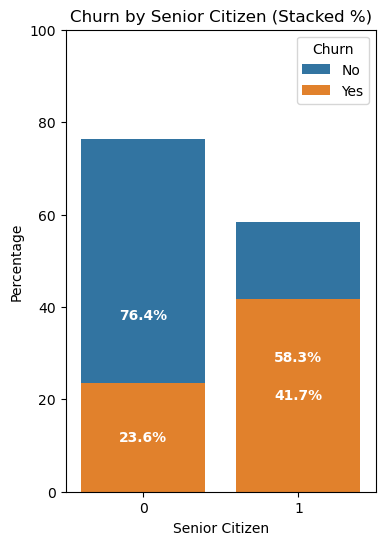

In [3]:
df_counts = df.groupby(['SeniorCitizen', 'Churn']).size().reset_index(name='count')
df_totals = df_counts.groupby('SeniorCitizen')['count'].transform('sum')
df_counts['percent'] = df_counts['count'] / df_totals * 100

# Create the stacked bar chart
plt.figure(figsize=(4, 6))
ax = sns.barplot(
    x='SeniorCitizen', 
    y='percent', 
    hue='Churn', 
    data=df_counts, 
    dodge=False
)

# Add percentage labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=10, color='white', weight='bold')

plt.title("Churn by Senior Citizen (Stacked %)")
plt.ylabel("Percentage")
plt.xlabel("Senior Citizen")
plt.ylim(0, 100)
plt.legend(title="Churn", loc="upper right")
plt.show()

#comparative a grater percentage of people in senior citizen category have churned

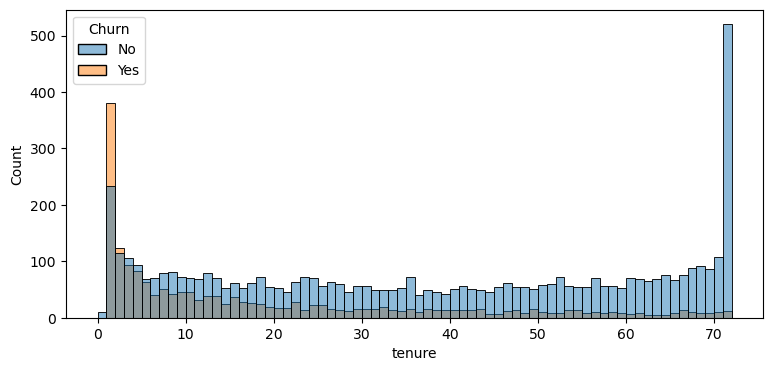

In [19]:
plt.figure(figsize=(9, 4))
sns.histplot(x = "tenure", data = df, bins = 72, hue ='Churn' )
plt.show()

#people who have used our services for a long time stayed and people who used our services 1 or 2 months have churned

<function matplotlib.pyplot.show(close=None, block=None)>

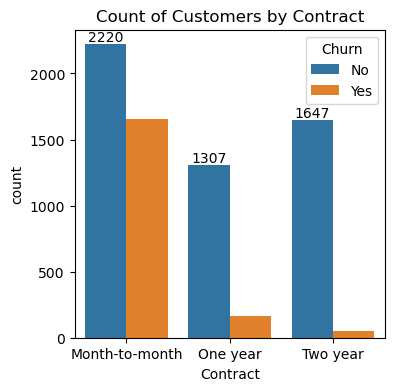

In [25]:
plt.figure(figsize = (4,4))
ax= sns.countplot(x= "Contract", data= df, hue= 'Churn')
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract")
plt.show

#people who have month to month conttract are likely to churn then from those who have 1 or 2 years of contract

In [29]:
df.columns.values


array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

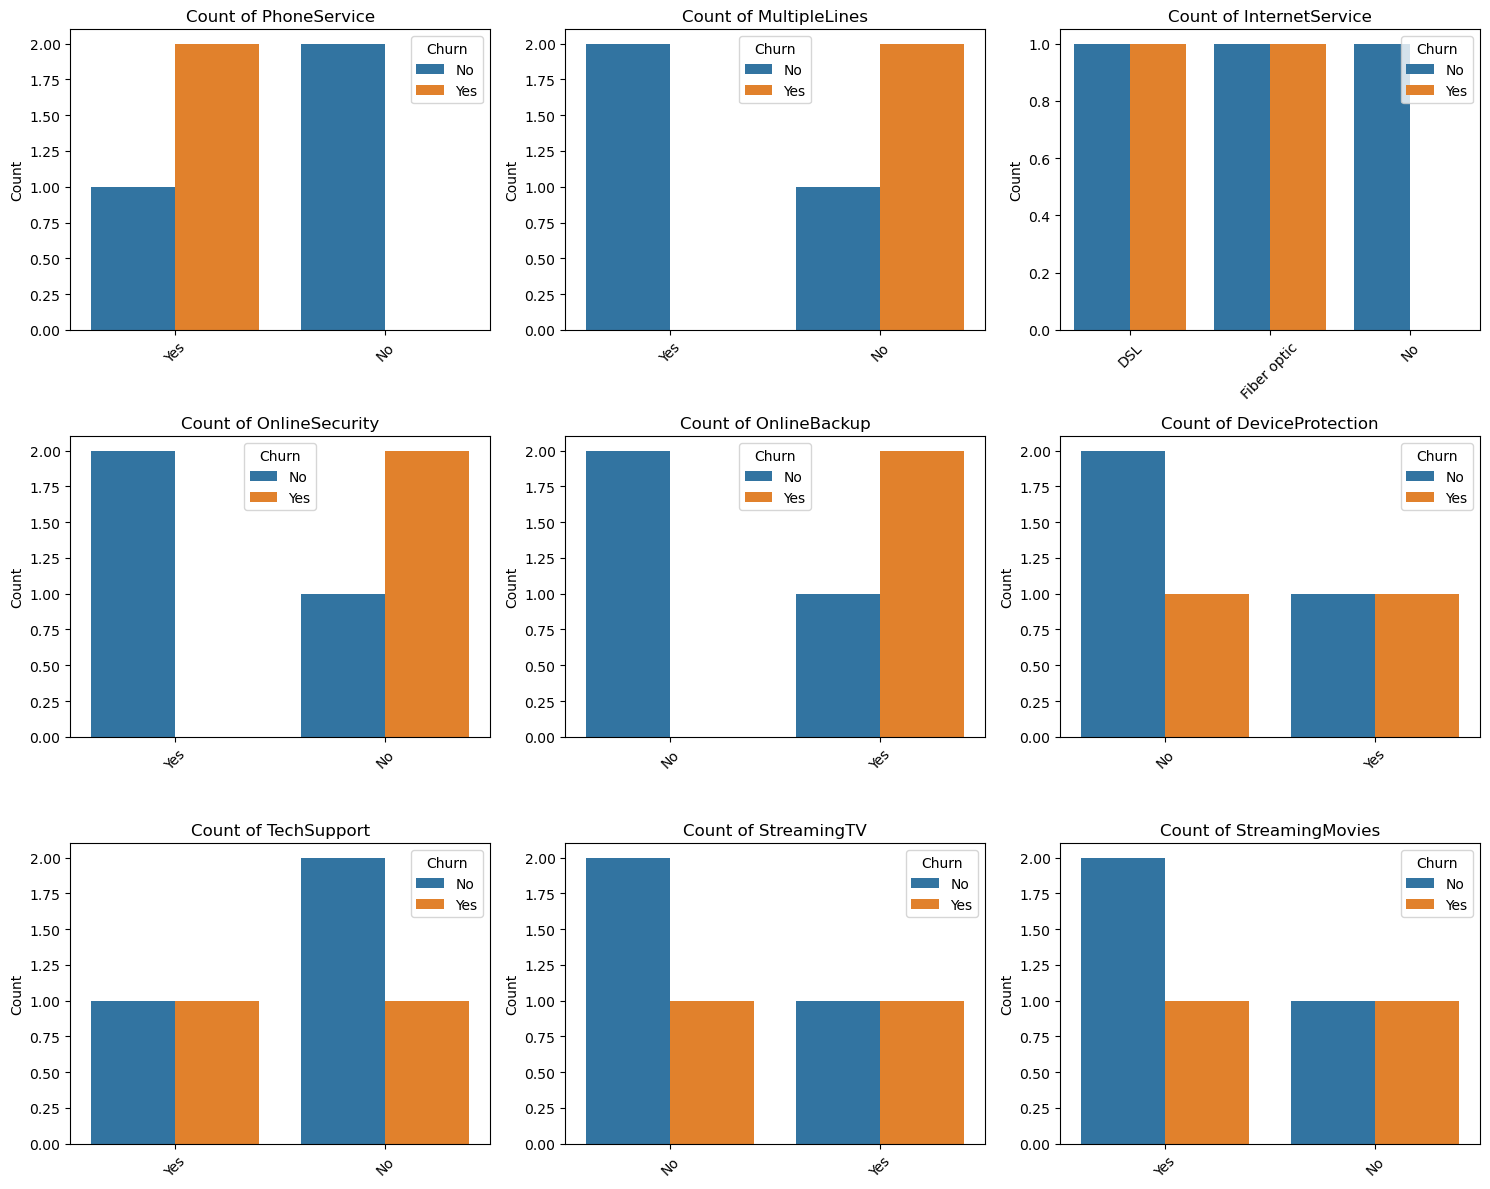

In [33]:
# Sample data (Replace this with your actual DataFrame)
data = pd.DataFrame({
    'PhoneService': ['Yes', 'No', 'Yes', 'No', 'Yes'],
    'MultipleLines': ['Yes', 'No', 'No', 'Yes', 'No'],
    'InternetService': ['DSL', 'Fiber optic', 'DSL', 'No', 'Fiber optic'],
    'OnlineSecurity': ['Yes', 'No', 'No', 'Yes', 'No'],
    'OnlineBackup': ['No', 'Yes', 'Yes', 'No', 'Yes'],
    'DeviceProtection': ['No', 'No', 'Yes', 'Yes', 'No'],
    'TechSupport': ['Yes', 'No', 'No', 'No', 'Yes'],
    'StreamingTV': ['No', 'Yes', 'Yes', 'No', 'No'],
    'StreamingMovies': ['Yes', 'No', 'Yes', 'Yes', 'No']
})

# List of categorical columns to plot
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))  # 3x3 grid

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through columns and create count plots
for i, col in enumerate(columns):
    sns.countplot(x=data[col], ax=axes[i], hue = df['Churn'])
    axes[i].set_title(f'Count of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout for better readability
plt.tight_layout()
plt.show()


#Online Security, Tech Support, and Online Backup show a higher proportion of churn among customers who do not have these services.

Phone Service and Multiple Lines appear to have a balanced distribution, with churn occurring in both categories.

Streaming TV and Streaming Movies exhibit a similar churn pattern, with no strong visible impact on customer retention.
These insights suggest that security and support services may play a role in reducing customer churn.

<function matplotlib.pyplot.show(close=None, block=None)>

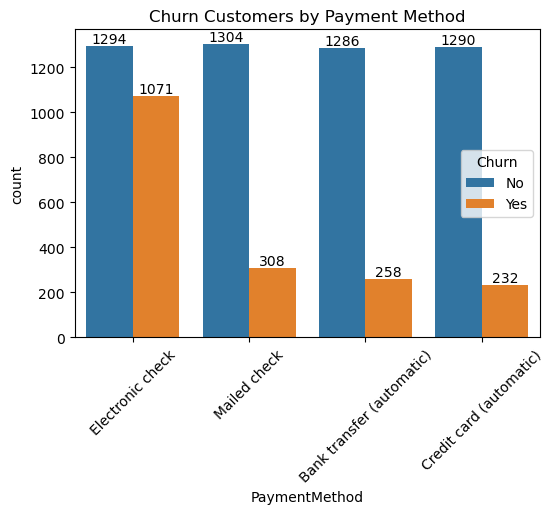

In [39]:
plt.figure(figsize = (6,4))
ax= sns.countplot(x= "PaymentMethod", data= df, hue= 'Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churn Customers by Payment Method")
plt.xticks(rotation = 45)
plt.show

#customer is likely to churn when he is using electronic check as a payment method